---
title: "Statistical Analysis of the 'Luxuriant' Treatment Effect on Hair Growth"
author: "Anastasia Akchurina"
date: "2023-11-17"
format:
    pdf:
        documentclass: report
        code-fold: true
execute: 
  enabled: true
  echo: false
  warning: false
---

## Abstract
 This report provides a comprehensive analysis of a clinical trial evaluating the effectiveness of a new drug "Luxuriant" for treating male pattern baldness. The study compares Luxuriant with a placebo and two existing anti-baldness treatments "BaldBeGone" and "HairyGoodness" considering hair growth and patients' ages. The analysis involves data manipulation, linear regression modeling and thorough model checking, and data visualisation.
 
Key findings include evidence of non-normality in the residuals distribution and violations of the assumption of constant variance. On the other hand, the results of the analysis offer valuable insights into the efficiency of Luxuriant compared to the placebo and other treatments. Luxuriant appears to be more effective than the placebo, though it falls behind HairyGoodness and BaldBeGone.

## Introduction
This report summarises the statistical analysis of a clinical trial for a new drug "Luxuriant" to treat male pattern baldness. The main objective of the report is to answer the following three questions and to present the results to the company: 

1) Is there an effect of Luxuriant above and beyond the placebo? 
2) Is Luxuriant more effective than the existing treatments on the market? 
3) Is age relevant to any effect? 

The data available for the analysis comprised hair growth in inches and the patients' age (from 30 to 73). The methods are commonly used for this sort of analysis included data manipulation, fitting a linear regression model, assessing the model assumptions, data visualisation and interpretation of results.

## Analysis

The new drug "Luxuriant" was considered in the same trial with both a placebo and two existing anti-baldness treatments "BaldBeGone" and "HairyGoodness". The pateients were randomly allocated to different groups, shaved and had any hair growth measured after one month of treatment.  The first four columns of the dataframe represent the hair growth results for "Luxuriant", the placebo, "BaldBeGone" and "HairyGoodness" respectively.

In [1]:
# Importing necessary libraries for the data analysis

# Importing pandas for data manipulation and analysis
import pandas as pd

# Importing numpy for numerical operations
import numpy as np

# Importing statsmodels.formula.api for specifying and estimating statistical models
import statsmodels.formula.api as smf

# Importing durbin_watson from statsmodels.stats.stattools for the Durbin-Watson independence testing
from statsmodels.stats.stattools import durbin_watson

# Importing matplotlib.pyplot for data visualisation
import matplotlib.pyplot as plt

# Importing qqplot from statsmodels.graphics.gofplots for quantile-quantile plot for the normality test
from statsmodels.graphics.gofplots import qqplot

# Importing shapiro from scipy.stats for the Shapiro-Wilk normality test
from scipy.stats import shapiro

# Importing statsmodels.api for statistical models and hypothesis tests
import statsmodels.api as sm

# Importing sms from statsmodels.stats.api for additional statistical tests
import statsmodels.stats.api as sms

# Importing seaborn for statistical data visualisation
import seaborn as sns

# Importing plotnine for creating ggplot-style plots
import plotnine as p9

# Importing ttest_ind from scipy.stats for the independency t-test
from scipy.stats import ttest_ind

In [2]:
#Reading the data HairGrowth
hair_growth = pd.read_csv("HairGrowth.csv")
hair_growth.head()

# Displaying the head of the dataframe with the first 4 columns
hair_growth.iloc[:, :4].head()

,Luxuriant,Placebo,BaldBeGone,HairyGoodness
0,0.792234,0.080613,0.280537,0.520870
1,0.605398,0.037706,2.251034,0.421710
2,0.694443,0.097158,1.421599,1.830612
3,0.054321,0.217363,0.694945,0.833303
4,1.478682,0.196568,0.751972,0.300818


 The next four columns of the dataframe represent age of the patients allocated to the groups by treatment.

In [3]:
# Displaying the head of the dataframe with the last 4 columns
hair_growth.iloc[:, -4:].head()

,AgeLuxuriant,AgePlacebo,AgeBaldBeGone,AgeHairyGoodness
0,58.7,44.2,50.6,51.0
1,60.7,52.7,52.2,52.3
2,53.7,48.4,66.4,52.5
3,62.7,46.1,46.0,54.4
4,49.5,56.7,60.9,40.0


## Data Manupilation
The first step in the analysis was to create separate groups based on different product types: Luxuriant, Placebo, BaldBeGone, and HairyGoodness, rename columns for consistency across different product groups and concatenate the groups into one dataframe which was necessary for further analysis.

In [4]:
#| output: false
#| echo: false
#Generating descriptive statistics of the HairGrowth data
hair_growth.describe()

,Luxuriant,Placebo,BaldBeGone,HairyGoodness,AgeLuxuriant,AgePlacebo,AgeBaldBeGone,AgeHairyGoodness
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.511791,0.097838,1.423312,0.737799,50.251000,50.940000,50.939000,49.720000
std,0.296292,0.094756,0.777351,0.433895,7.617252,6.635366,6.698453,6.425737
min,0.045475,0.001391,0.131053,0.045387,30.600000,37.500000,36.600000,37.300000
25%,0.279027,0.036078,0.824125,0.421480,44.850000,46.250000,46.375000,45.375000
50%,0.461345,0.072737,1.292014,0.670954,51.000000,49.800000,50.750000,48.700000
75%,0.699992,0.131014,1.927983,0.868101,54.750000,55.825000,54.650000,53.425000
max,1.478682,0.522254,3.918068,2.183470,73.400000,69.800000,71.300000,68.300000


In [5]:
# Creating separate groups based on different product types: Luxuriant, Placebo, BaldBeGone, and HairyGoodness

#Grouping by Luxuriant
luxuriant_group = hair_growth[['Luxuriant', 'AgeLuxuriant']].copy()

#Grouping by Placebo
placebo_group = hair_growth[['Placebo', 'AgePlacebo']].copy()

#Grouping by BaldBeGone
bald_be_gone_group = hair_growth[['BaldBeGone', 'AgeBaldBeGone']].copy()

#Grouping by HairyGoodness
hairy_goodness_group = hair_growth[['HairyGoodness', 'AgeHairyGoodness']].copy()

In [6]:
# Renaming columns for consistency across different product groups and preparing the data for concatenation which is necessary for further analysis 

#Grouping by Luxuriant
luxuriant_group.columns = ['Hair Growth', 'Age']

#Grouping by Placebo
placebo_group.columns = ['Hair Growth', 'Age']

#Grouping by BaldBeGone
bald_be_gone_group.columns = ['Hair Growth', 'Age']

#Grouping by HairyGoodness
hairy_goodness_group.columns = ['Hair Growth', 'Age']

In [7]:
# Adding a 'Product' column to each group
luxuriant_group['Product'] = 'Luxuriant'
placebo_group['Product'] = 'Placebo'
bald_be_gone_group['Product'] = 'BaldBeGone'
hairy_goodness_group['Product'] = 'HairyGoodness'

# Concatenating the groups into one dataframe
combined_df = pd.concat([luxuriant_group, placebo_group, bald_be_gone_group, hairy_goodness_group], ignore_index=True)

# Displaying the combined dataframe
print("Combined DataFrame:")
combined_df.head()

Combined DataFrame:


,Hair Growth,Age,Product
0,0.792234,58.7,Luxuriant
1,0.605398,60.7,Luxuriant
2,0.694443,53.7,Luxuriant
3,0.054321,62.7,Luxuriant
4,1.478682,49.5,Luxuriant


Next step in data manipulation was to change units from inches to mm, round age to whole years and change indexes so the dataframe looked more natural and appealing.

In [8]:
# Rounding patients' age to whole years
combined_df['Age'] = np.floor(combined_df['Age'])

# Changing inches to mm
combined_df['Hair Growth'] = combined_df['Hair Growth'] * 25.4

# Changing indexes
combined_df.index = range(1, 401)

# Displaying the updated dataframe
print("Updated DataFrame:")
combined_df.head()

Updated DataFrame:


,Hair Growth,Age,Product
1,20.122736,58.0,Luxuriant
2,15.377107,60.0,Luxuriant
3,17.638841,53.0,Luxuriant
4,1.379751,62.0,Luxuriant
5,37.558535,49.0,Luxuriant


Furthermore, since we want to know how treatments and age of patients influence hair growth, the linear regression model was designed and fitted: Hair_Growth ~ Age + Product.

In [9]:
#| output: false
#| echo: false

# Creating a copy of the combined dataframe for modeling
hair = combined_df.copy(deep=True)

# Renaming the 'Hair Growth' column
hair = combined_df.rename(columns={'Hair Growth': 'Hair_Growth'})

# Creating a linear regression model with log-transformed 'Hair_Growth'
sm_lin_reg = smf.ols(formula='Hair_Growth ~ Age + Product', data=hair)

# Fitting the model
model = sm_lin_reg.fit()

# Getting summary data for the log-transformed model
sm_mod_sum = model.summary()

# Displaying the summary data
print(sm_mod_sum)

                            OLS Regression Results                            
Dep. Variable:            Hair_Growth   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     103.8
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           2.35e-60
Time:                        14:20:48   Log-Likelihood:                -1558.4
No. Observations:                 400   AIC:                             3127.
Df Residuals:                     395   BIC:                             3147.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

\clearpage

## Model checking
A host of testing and plotting were performed to check the model assumptions.

For assessing normality: 

1) Histogram of residuals

2) Quantile-Quantile plot

3) Shapiro-Wilk’s test, and other residual plots

For testing independence:

1) Residuals plot

2) Durbin-Watson test

For variance testing: 

1) Variance plot

2) Breusch-Pagan test

And creating a plot to check predicted vs observed values.

Both the "Histogram of residuals" and the Quantile-Quantile plot show evidence of non normality as does the Shapiro-Wilk’s test. Therefore, we might want to consider transforming the response data to make it more normal or designing an alternative model. 

/opt/conda/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 35'. Pick better value with 'binwidth'.


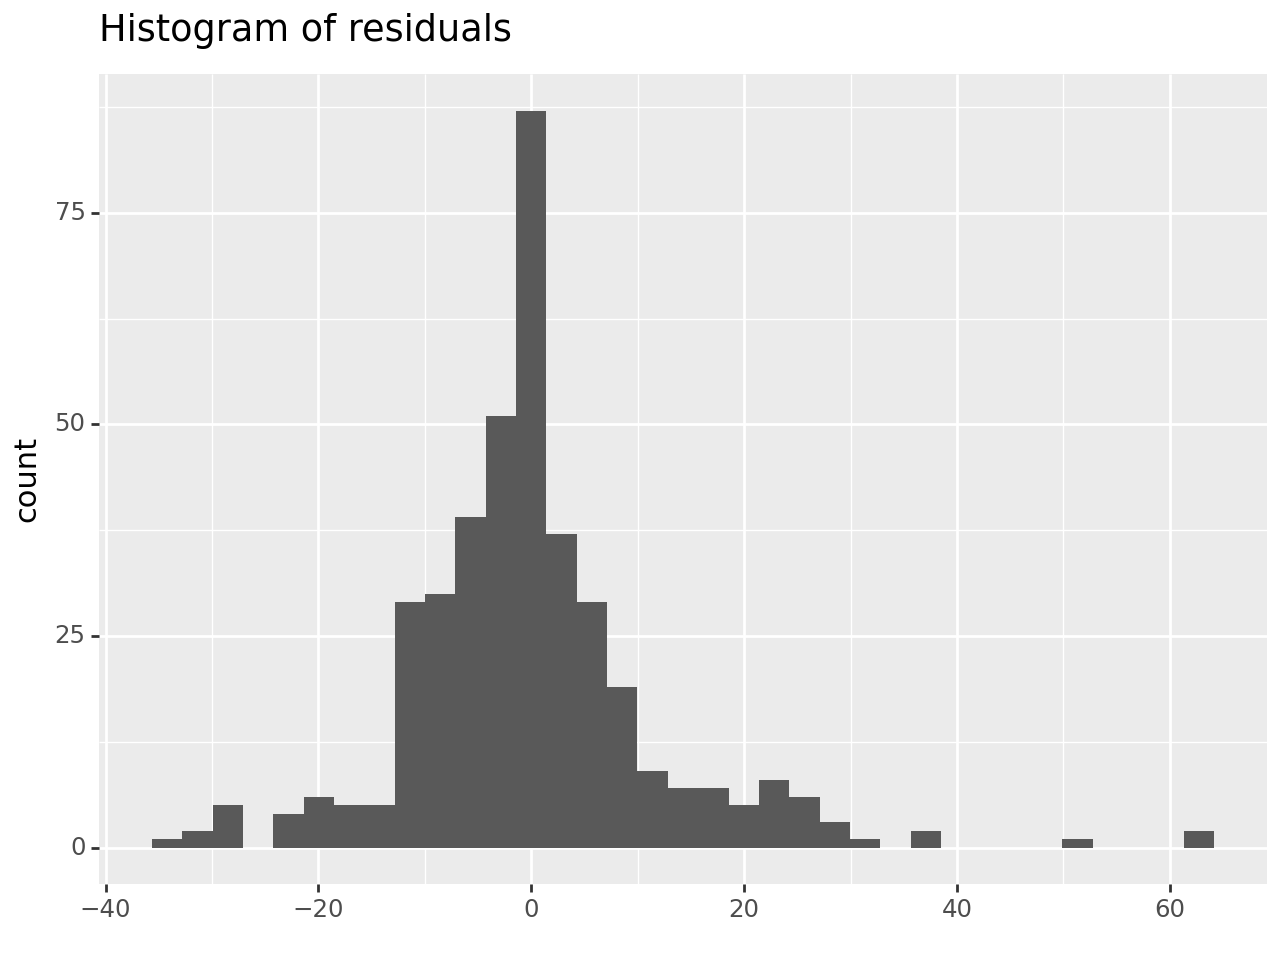

In [10]:
# Creating a histogram of residuals from the linear regression model
plot2 = (p9.ggplot() + p9.geom_histogram(p9.aes(x=model.resid)) 
    + p9.ggtitle("Histogram of residuals"))

# Drawing the histogram
plot2.draw()

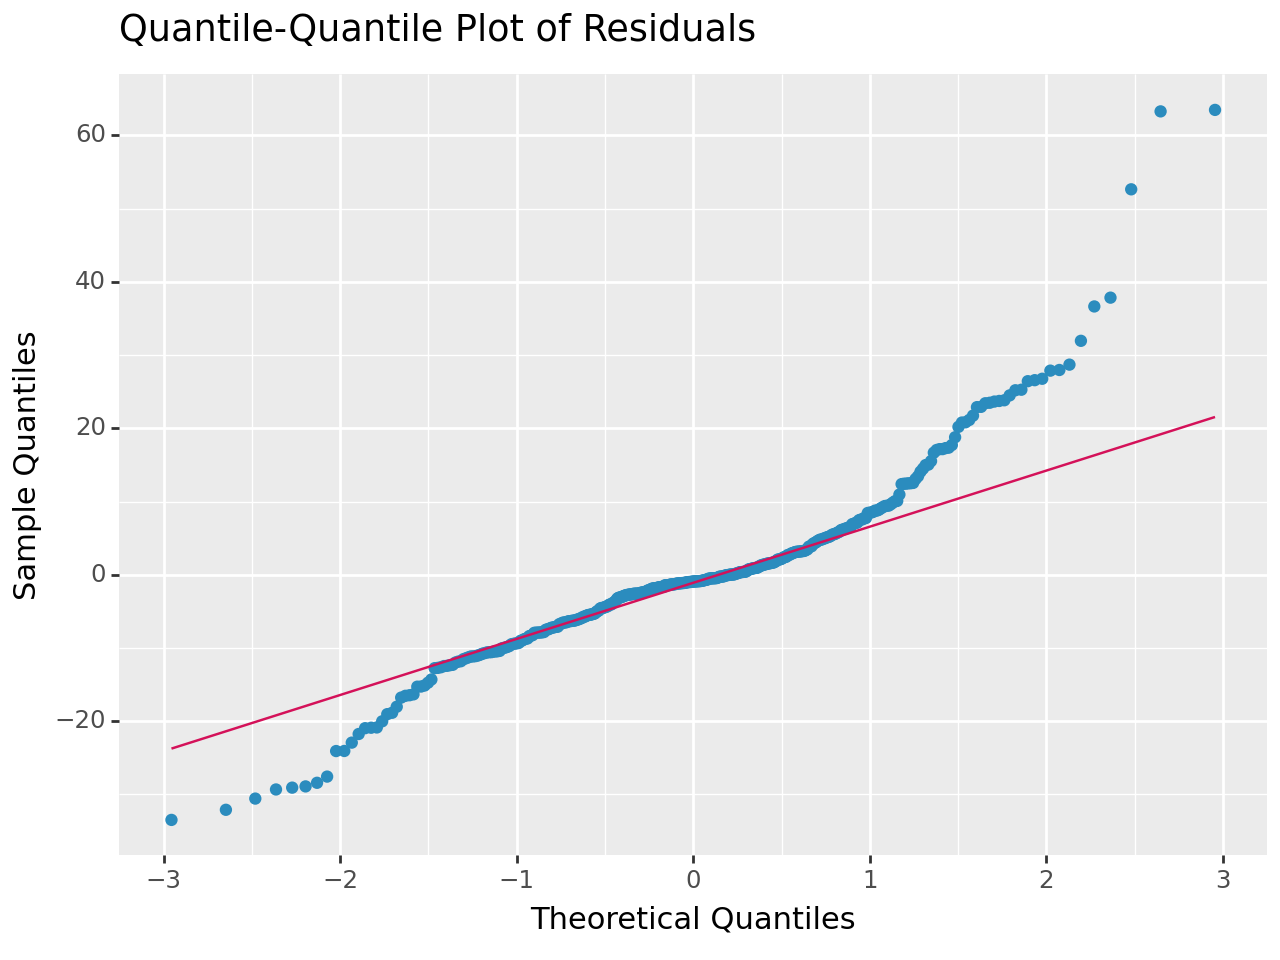


Normality test
ShapiroResult(statistic=0.9094886183738708, pvalue=9.946553739610849e-15)


In [11]:
# Creating a Quantile-Quantile plot to check the normality of residuals
qq_plot = (p9.ggplot(p9.aes(sample=model.resid))
		+ p9.stat_qq(colour="#2b8cbe") + p9.stat_qq_line(colour='#D41159')
        + p9.ggtitle("Quantile-Quantile Plot of Residuals") + p9.xlab("Theoretical Quantiles") + p9.ylab("Sample Quantiles"))

# Displaying the Quantile-Quantile plot
print(qq_plot)

# Performing the Shapiro-Wilk’s test of the normality of the residuals
print("Normality test")
print(shapiro(model.resid))

\clearpage

The "Residuals vs. Age" and "Residuals vs. Hair Growth" scatter plots confirm the non-normality of the residuals distribution as we expect to see a roughly horizontal band around zero.

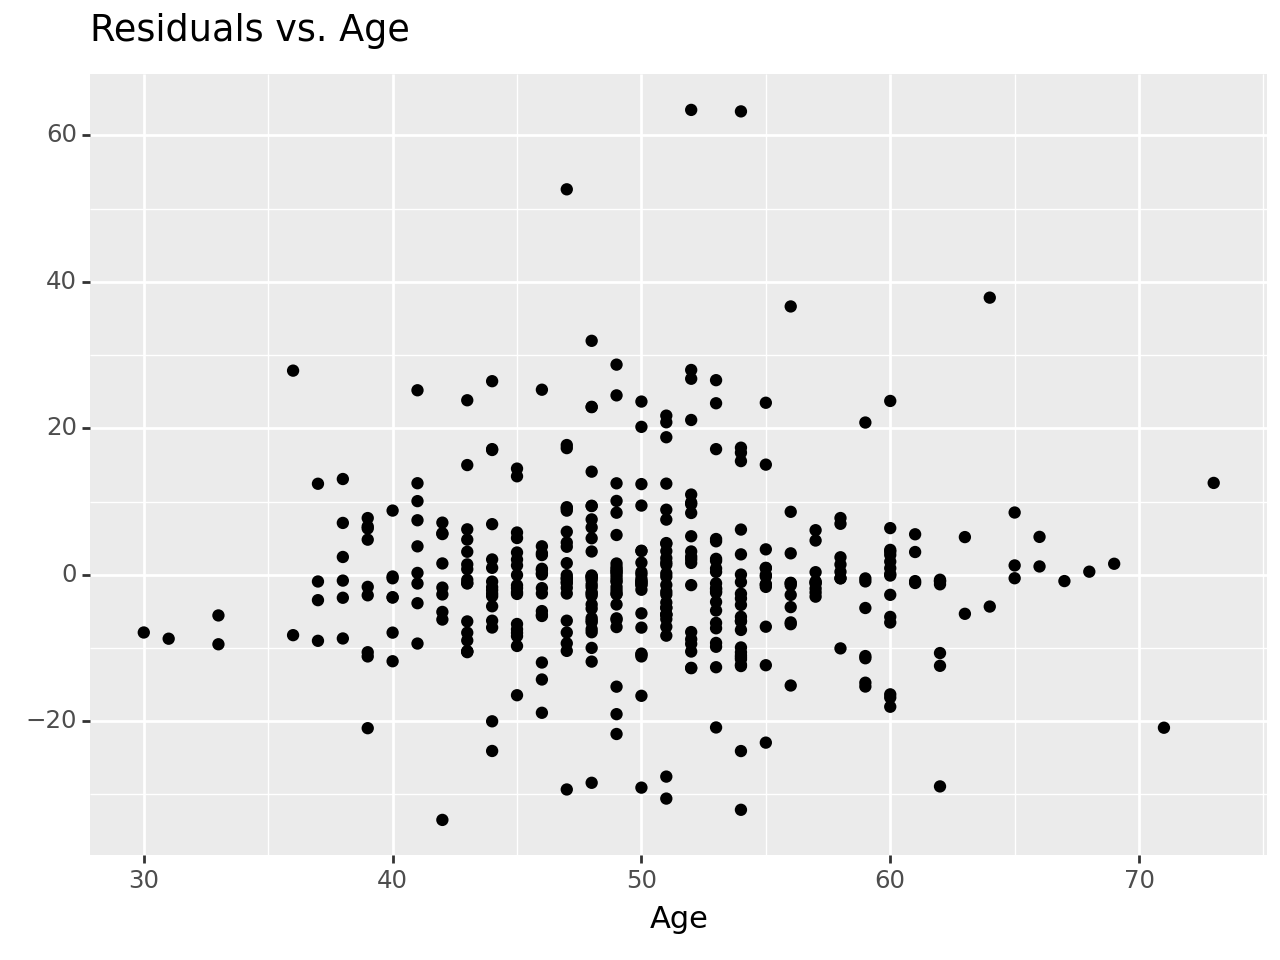

In [12]:
# Creating a scatter plot of residuals against patient age
res_age = (p9.ggplot() + p9.geom_point(p9.aes(x=hair.Age, y=model.resid)) 
    + p9.ggtitle("Residuals vs. Age"))

# Drawing the scatter plot
res_age.draw()

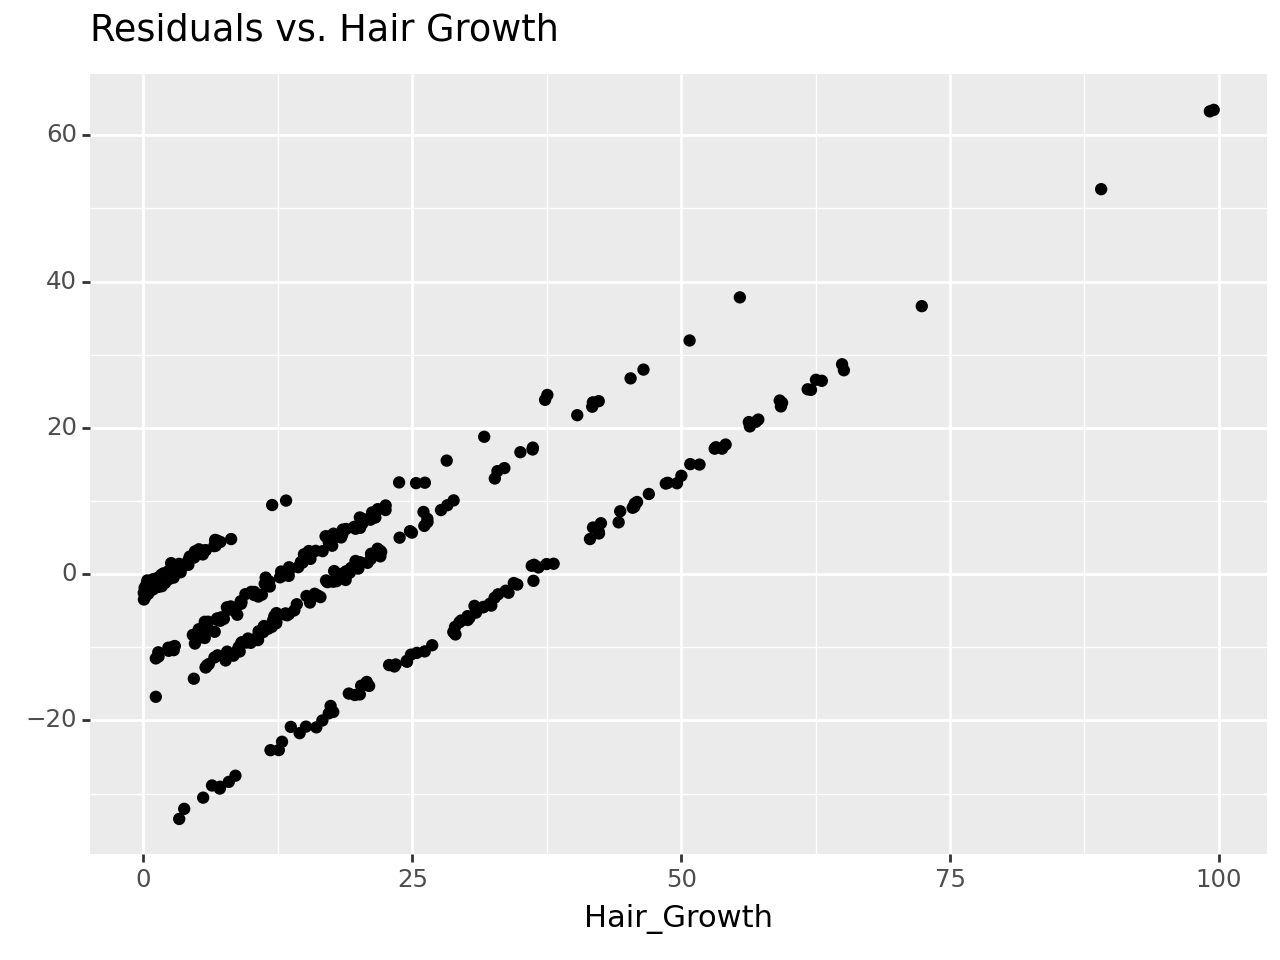

In [13]:
# Creating a scatter plot of residuals against patient age
res_age = (p9.ggplot() + p9.geom_point(p9.aes(x=hair.Hair_Growth, y=model.resid)) 
    + p9.ggtitle("Residuals vs. Hair Growth"))

# Drawing the scatter plot
res_age.draw()

\clearpage

The aim of creating the following boxplots is to identify if there are systematic differences in the residuals distribution among the drugs and placebo. We can see that the "BaldBeGone" drug has the highest level of noise around it and the placebo has the lowest.

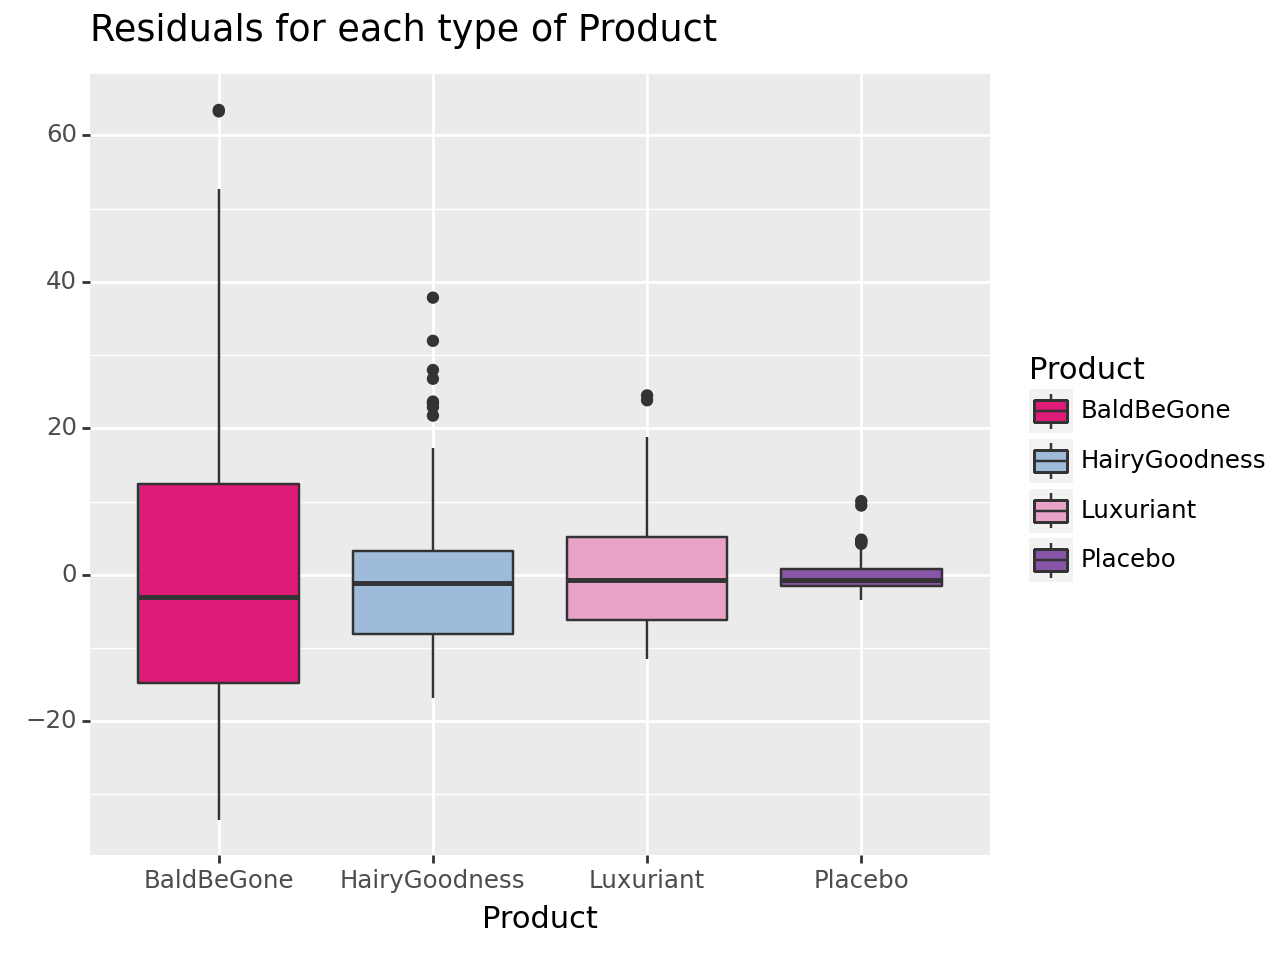

In [14]:
# Creating boxplots of residuals for each type of product
plot3 = (p9.ggplot() + p9.geom_boxplot(p9.aes(y=model.resid, 
                                      x=hair['Product'], 
                                      group=hair['Product'], fill=hair['Product']))
                               +p9.ggtitle("Residuals for each type of Product")
                               +p9.scale_fill_manual(values=['#dd1c77', '#9ebcda', '#e9a3c9', '#8856a7']))
# Drawing the boxplots
plot3.draw()

\clearpage

According to the "Residuals Plot" and the Durbin-Watson test, the residuals are independent.

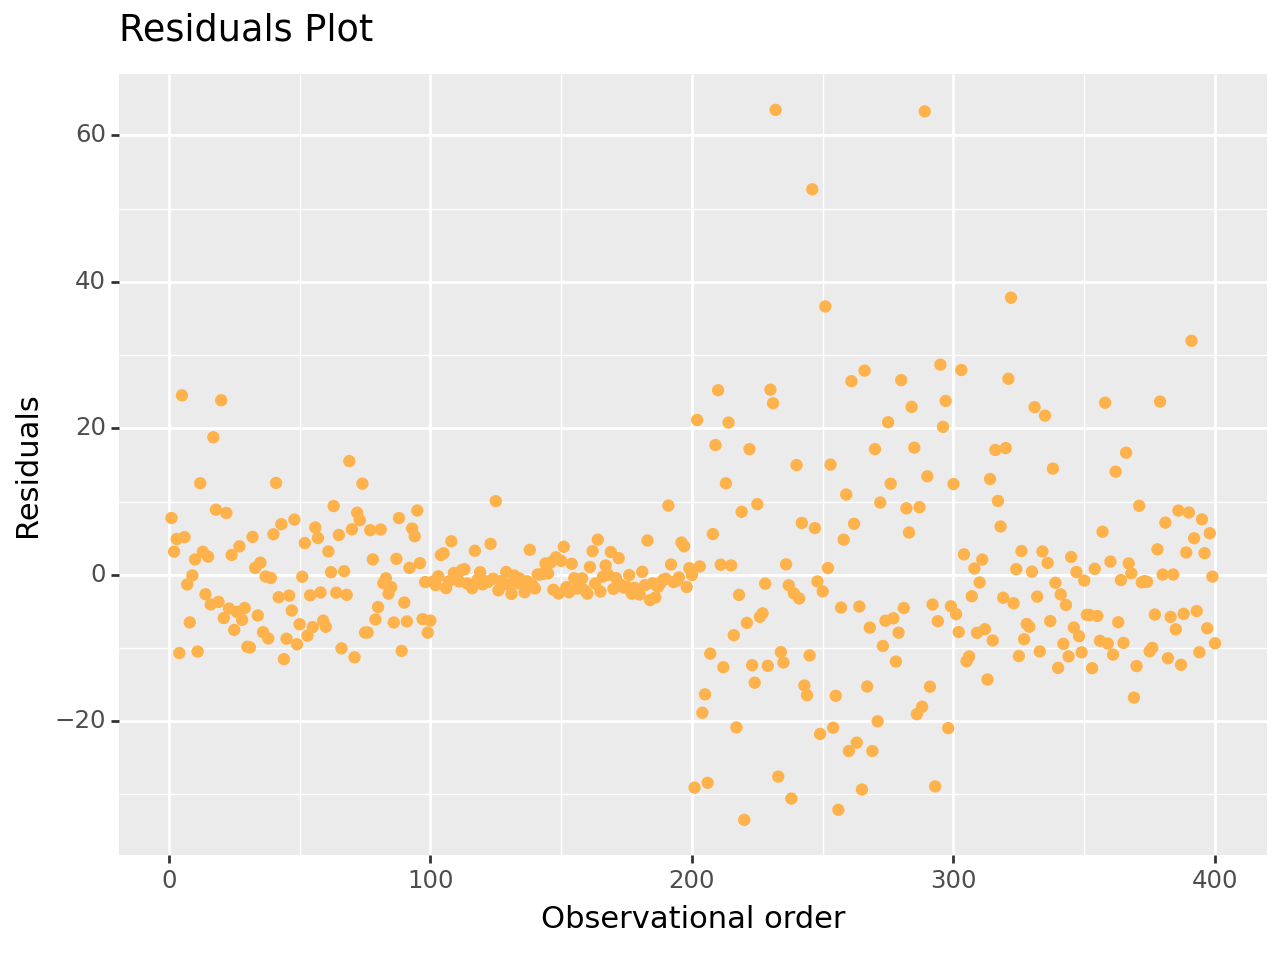


Independnece Test
1.9768599638153963


In [15]:
# Creating a residuals plot with observational order on the x-axis and log-transformed residuals on the y-axis
residuals = (p9.ggplot(p9.aes(range(1, len(hair)+1), model.resid))
		+ p9.geom_point(colour='#feb24c')
        + p9.ggtitle("Residuals Plot") + p9.xlab("Observational order") + p9.ylab("Residuals"))

# Displaying the residuals plot
print(residuals)

# Testing the independence of residuals using the Durbin-Watson test
# Range of 1.5 and 2.5 means the residuals are independent
print("Independnece Test")
print(durbin_watson(model.resid))

\clearpage

The "Variance Plot" and the Breusch-Pagan test suggest that the assumption of constant variance of residuals is violated. The values in the output indicate that the test statistic (Lagrange multiplier) is relatively large and the associated p-values are extremely small. This provides a strong evidence against the assumption of constant variance.

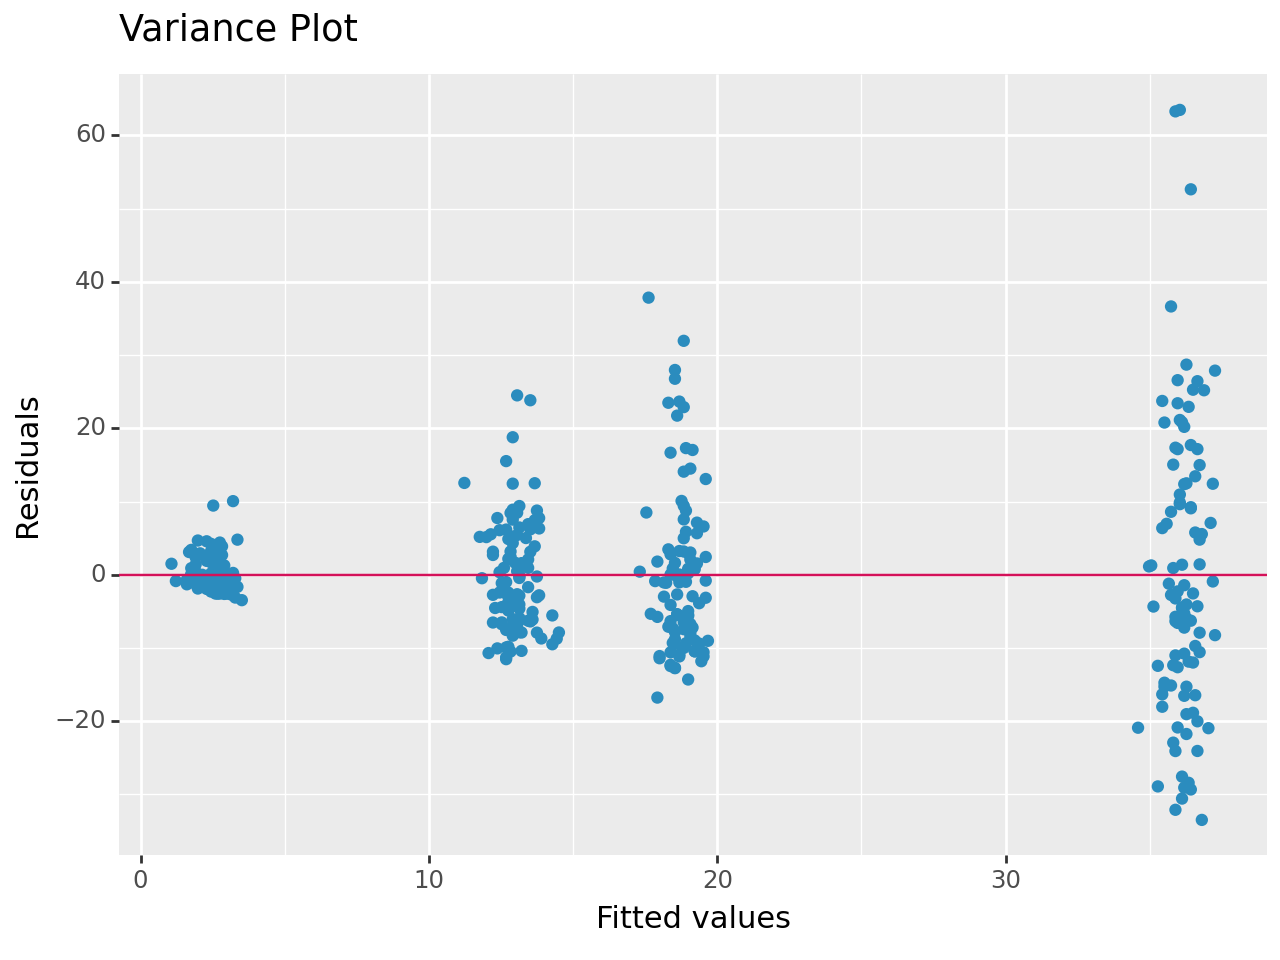


Constant Variance Test
[('Lagrange multiplier statistic', 61.063008737020574), ('p-value', 1.7341266798624277e-12), ('f-value', 17.790835076193133), ('f p-value', 1.9279882269764737e-13)]


In [16]:
# Zipping multiple iterables into a list of tuples
def lzip(*args):
    return list(zip(*args))

# Creating a plot to check constant variance
variance = (p9.ggplot() + p9.geom_point(p9.aes(x=model.fittedvalues, y=model.resid), colour="#2b8cbe")
        + p9.geom_abline(p9.aes(intercept=0, slope=0), colour='#D41159')
        + p9.ggtitle("Variance Plot") + p9.xlab("Fitted values") + p9.ylab("Residuals"))

# Displaying the variance plot
print(variance)

# Performing the Breusch-Pagan test for constant variance
print("Constant Variance Test")
names = ['Lagrange multiplier statistic', 
         'p-value',
         'f-value', 
         'f p-value']

#Showing the result of the Breusch-Pagan test 
print(lzip(names, sms.het_breuschpagan(model.resid, model.model.exog)))

\clearpage

The "Observed Values vs. Fitted Values" plot conveys there might be an evidence that the model predictions are lower than the actual values as we expect the fitted vs observed values to be on a 45∘ line.

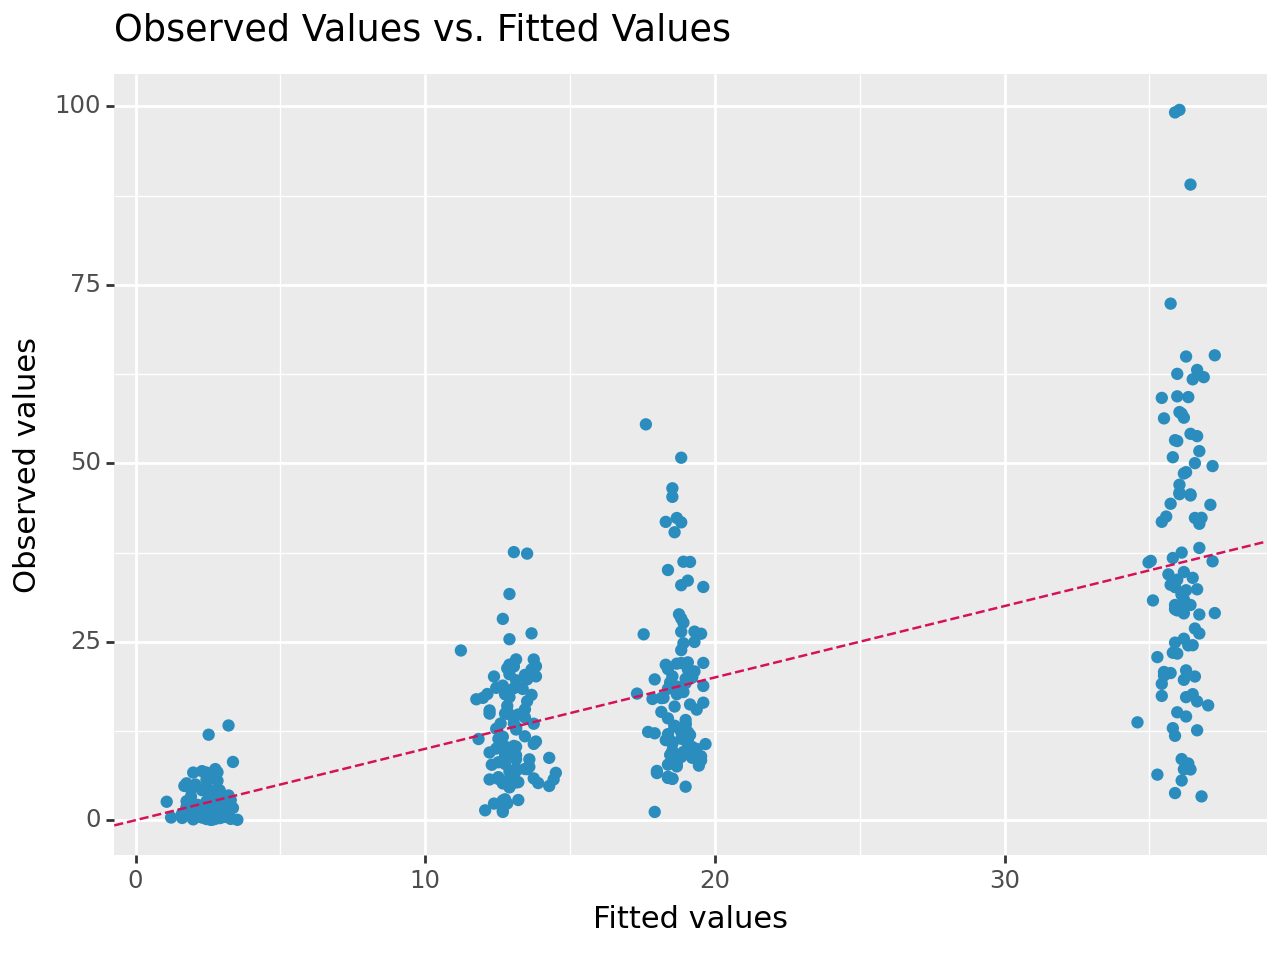

In [17]:
# Creating a plot to check predicted vs observed values
pred_obs = (p9.ggplot() + p9.geom_point(p9.aes(x=model.fittedvalues, y=hair["Hair_Growth"]), colour="#2b8cbe")
            + p9.ggtitle("Observed Values vs. Fitted Values")
            + p9.geom_abline(p9.aes(intercept=0, slope=1), colour='#D41159', linetype='dashed')
            + p9.xlab("Fitted values") + p9.ylab("Observed values"))

# Displaying the plot
print(pred_obs)

\clearpage

## Results
Is there an effect of Luxuriant above and beyond the placebo? 

To answer this question we created a side-by-side boxplots to compare the effect of Luxuriant vs. Placebo on hair growth and conducted an independent two-sample t-test. The test statistic is 13.307 and the p-value is 2.604826e-25 which indicates a significant difference between Luxuriant and placebo. In addition, the boxplots "Effect of Products vs. Placebo on Hair Growth" conveyed that Luxuriant is more effective for hair growth than Placebo which is a good news for Luxuriant developers.

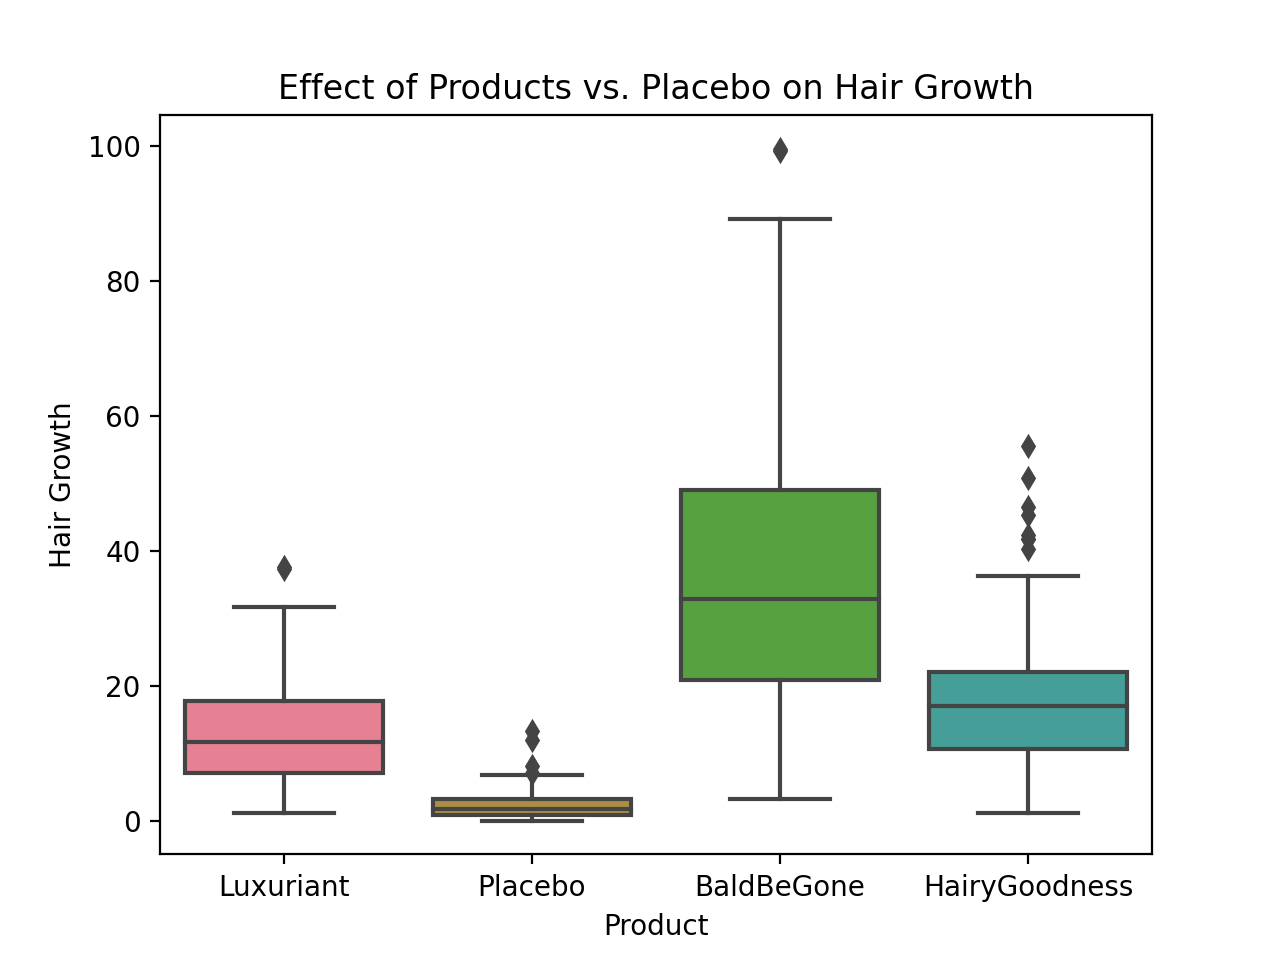

In [18]:
# 1) Is there an effect of Luxuriant above and beyond the placebo? 

# Creating a side-by-side boxplot to compare the effect of Luxuriant vs. Placebo on Hair Growth
boxplot1 = sns.boxplot(x = 'Product', y = 'Hair Growth', data=combined_df[['Hair Growth', 'Product']], palette = sns.color_palette("husl"))

# Adding title and labels to the boxplot
plt.title('Effect of Products vs. Placebo on Hair Growth')
plt.xlabel('Product')
plt.ylabel('Hair Growth')

# Displaying the boxplot
plt.show()

In [19]:
# Extracting hair growth data for Luxuriant and Placebo groups
luxuriant = combined_df[combined_df['Product'] == 'Luxuriant']['Hair Growth']
placebo = combined_df[combined_df['Product'] == 'Placebo']['Hair Growth']

# Performing an independent two-sample t-test with unequal variances
t_statistic, p_value = ttest_ind(luxuriant, placebo, equal_var=False)

# Setting the significance level
alpha = 0.05

# Displaying the results of the t-test
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpreting the results based on the significance level
if p_value < alpha:
    print("Luxuriant is more effective than Placebo.")
else:
    print("There is no significant difference between Luxuriant and Placebo.")

T-statistic: 13.307183044116524
P-value: 2.6048259801032925e-25
Luxuriant is more effective than Placebo.


2) Is Luxuriant more effective than the existing treatments on the market?

To analyse the effectiveness of Luxuriant for hair growth among other drugs, two scatter plots were created: a scatter plot with a regression line for each product and "Hair Growth by Age and Product" scatter plot. Both plots show that Luxuriant is not as effective as HairyGoodness and BaldBeGone treatments since it is scattered lower in the plot than other drugs except for placebo.

\clearpage

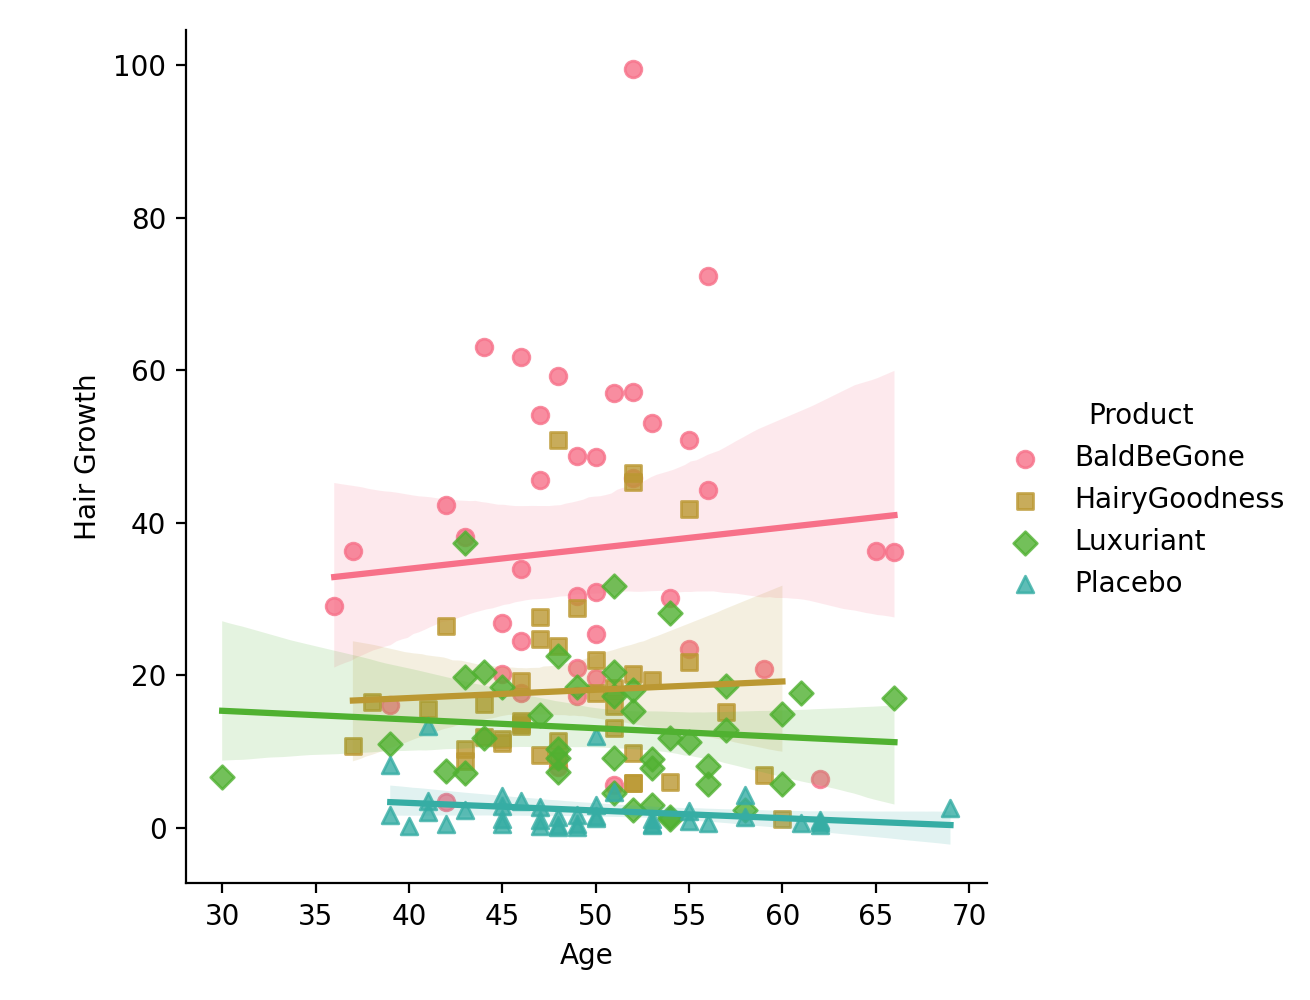

In [21]:
#2) Is Luxuriant more effective than the existing treatments on the market?

# Creating a smaller amount of samples to make the plot look more clean
sampled_df = pd.concat([group.sample(n=40) for _, group in combined_df.groupby('Product')])

# Creating a scatter plot with a regression line for each product
sns.lmplot(x='Age', y='Hair Growth', hue='Product', data = sampled_df, palette = sns.color_palette("husl"), markers=["o", "s", "D", "^"])

# Adding labels to the scatter plot
plt.xlabel('Age')
plt.ylabel('Hair Growth')

# Displaying the scatter plot
plt.show()

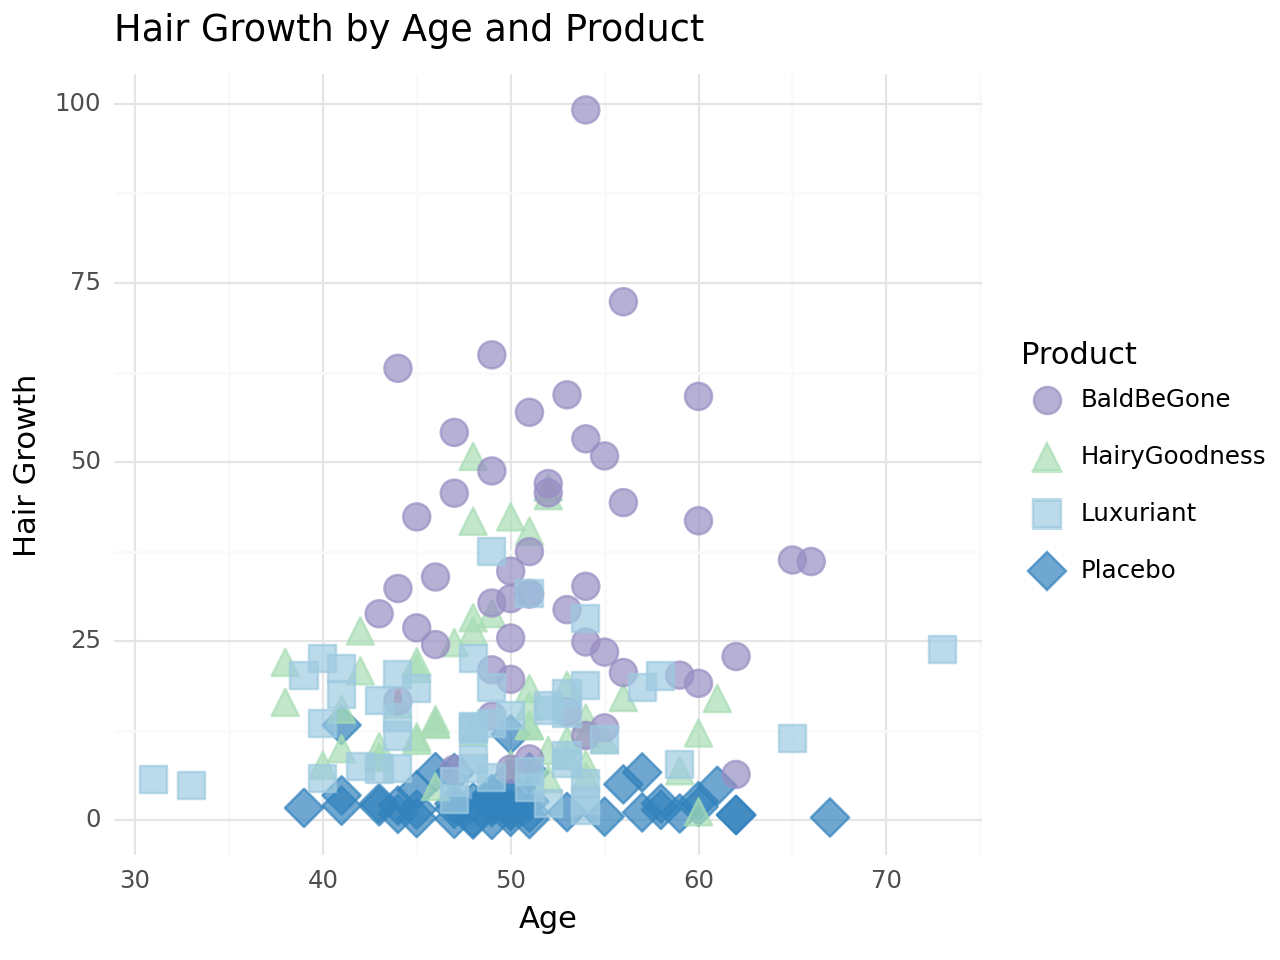

In [22]:
# 2) Is Luxuriant more effective than the existing treatments on the market?

# Subsampling the combined dataframe to make the plot look more clean
subsampled_df = combined_df.iloc[::2]

# Creating a scatter plot to compare hair growth by age and product
plot1 = (p9.ggplot(subsampled_df, p9.aes(x='Age', y='Hair Growth', color='Product', shape = 'Product'))  
    + p9.geom_point(size=5, alpha=0.7) 
    + p9.scale_color_manual(values={'Luxuriant': '#9ecae1', 'Placebo': '#3182bd', 'BaldBeGone': '#998ec3', 'HairyGoodness': '#a8ddb5'})
    + p9.theme_minimal()
    + p9.ggtitle("Hair Growth by Age and Product"))

# Drawing the scatter plot
plot1.draw()

\clearpage

3) Is age relevant to any effect?

Finally, creating a grouped bar plot was considered a good option to analyse the relationship between age, product, and average hair growth. The "Average Hair Growth by Age Category and Product" plot shows that there is no significant variability in age regarding other factors meaning age is not quite relevant to any of the effects.

/tmp/ipykernel_115/795377946.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



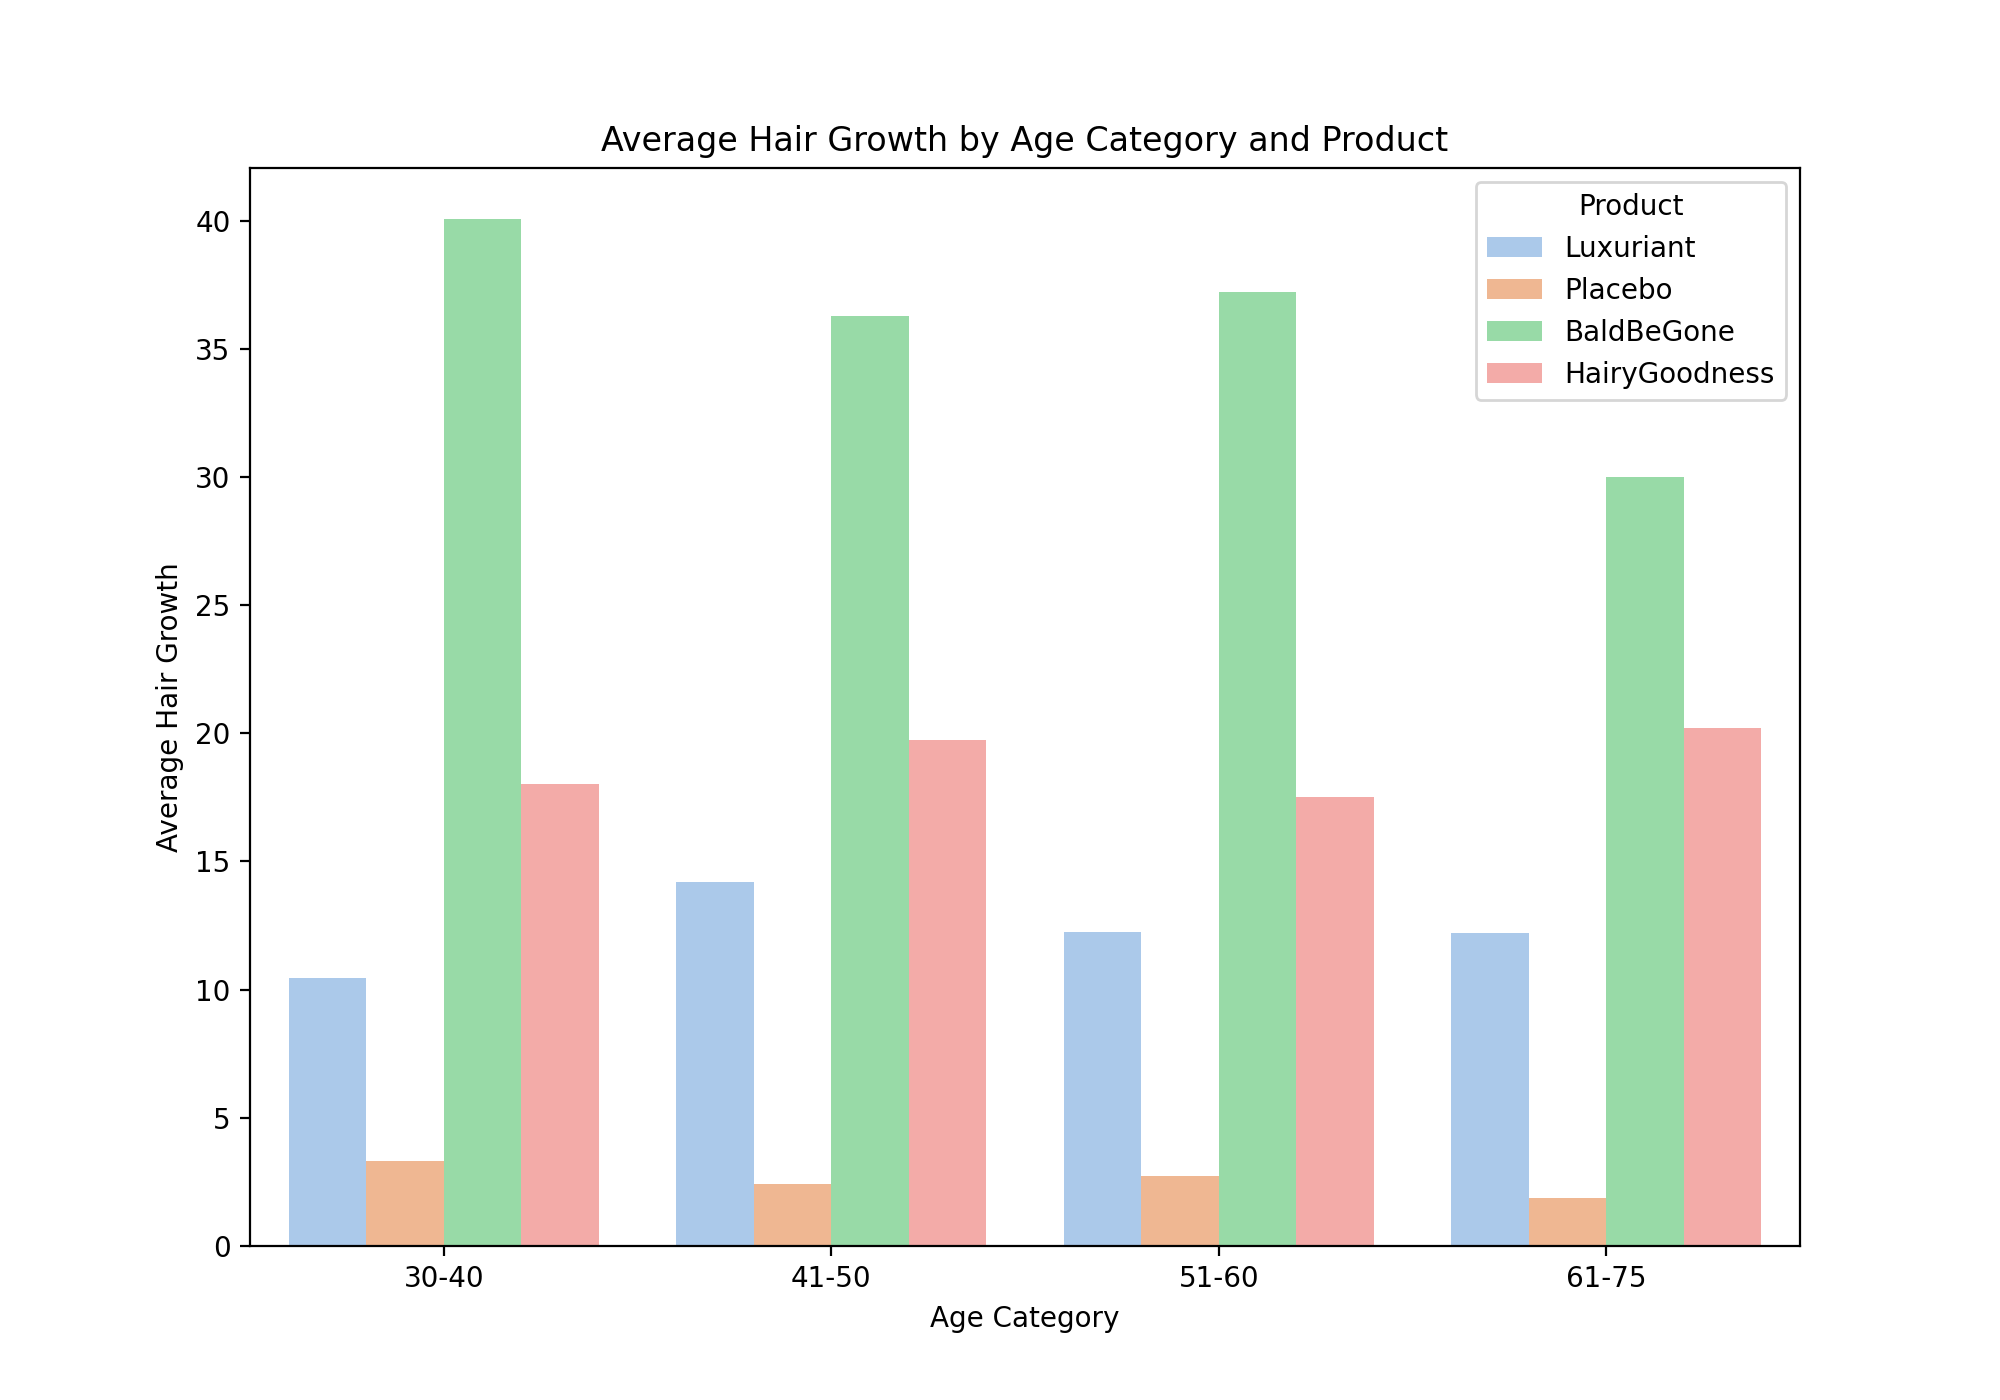

In [23]:
#3) Is age relevant to any effect?

# Creating age categories
bins = [30, 40, 50, 60, 70]
labels = ['30-40', '41-50', '51-60', '61-75']

# Categoriding age data into age categories
combined_df['AgeCategory'] = pd.cut(combined_df['Age'], bins=bins, labels=labels, right=False)

# Setting a colour palette for better distinction
sns.set_palette("pastel")

# Creating a grouped bar plot to analyse the relationship between age, product, and average hair growth
plt.figure(figsize=(10, 7))
sns.barplot(x='AgeCategory', y='Hair Growth', hue='Product', data=combined_df, ci=None)

# Customising the plot
plt.title('Average Hair Growth by Age Category and Product')
plt.xlabel('Age Category')
plt.ylabel('Average Hair Growth')
plt.legend(title='Product')

# Displaying the plot
plt.show()

## Discussion / Conclusion

To sum it all up, the clinical trial suggests that Luxuriant has a positive effect on hair growth surpassing the placebo but falling short of the effectiveness demonstrated by HairyGoodness and BaldBeGone. Model checking procedures revealed some problems in meeting the assumptions of normality and constant variance in the residuals.

The assessment of age as a relevant factor in the treatment effects suggests that age does not significantly contribute to the variability observed in the responses to Luxuriant and other treatments.

The findings from this analysis are a good soil for the developers of Luxuriant drug, providing insights about its performance in comparison to existing treatments. Further investigations and adjustments in the modelling approach may be considered to refine the analysis and address the challenges discovered in the data. Overall, this report contributes to the understanding of the clinical trial results and provides much food for thought in terms of research and development in the field of hair growth treatments.